In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
sepal=np.loadtxt('data/iris_sepal_cl0.csv', delimiter=',', skiprows=1)
print( sepal.shape )

(50, 2)


In [3]:
s_len=sepal[:, 0]
s_width=sepal[:, 1]
print( s_len.shape )
print( s_len[0:5] )
print( s_width.shape )
print( s_width[0:5] )

(50,)
[5.1 4.9 4.7 4.6 5. ]
(50,)
[3.5 3.  3.2 3.1 3.6]


In [4]:
r, p=pearsonr(s_len, s_width)
print("相関係数:", r)
print("p値:", p)

相関係数: 0.7467803732639268
p値: 4.751986580148956e-10


In [6]:
s_len_2d=sepal[:, :1]
print( s_len_2d.shape )

(50, 1)


In [7]:
reg=LinearRegression()
reg.fit(s_len_2d, s_width)
pred=reg.predict(s_len_2d)
print(pred)

[3.49387996 3.33243323 3.1709865  3.09026313 3.4131566  3.73605006
 3.09026313 3.4131566  2.9288164  3.33243323 3.73605006 3.25170986
 3.25170986 2.84809303 4.05894353 3.97822016 3.73605006 3.49387996
 3.97822016 3.49387996 3.73605006 3.49387996 3.09026313 3.49387996
 3.25170986 3.4131566  3.4131566  3.57460333 3.57460333 3.1709865
 3.25170986 3.73605006 3.57460333 3.81677343 3.33243323 3.4131566
 3.81677343 3.33243323 2.9288164  3.49387996 3.4131566  3.00953977
 2.9288164  3.4131566  3.49387996 3.25170986 3.49387996 3.09026313
 3.6553267  3.4131566 ]


In [8]:
a=reg.intercept_
b=reg.coef_[0]
print("a:", a)
print("b:", b)

a: -0.623011727604216
b: 0.807233665122696


In [9]:
MSE=metrics.mean_squared_error(s_width, pred)
R2=metrics.r2_score(s_width, pred)
print("MSE:", MSE)
print("R2:", R2)

MSE: 0.06293138858775997
R2: 0.5576809258922097


In [10]:
xmin=np.amin(s_len)
xmax=np.amax(s_len)
x=np.array([xmin, xmax])
y=a+b*x

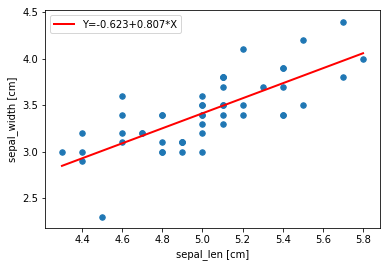

In [11]:
lin_label="Y={0:.3f}+{1:.3f}*X".format(a, b)
plt.scatter(s_len, s_width, s=30)
plt.plot(x, y, color='red', linewidth=2, label=lin_label)
plt.xlabel('sepal_len [cm]')
plt.ylabel('sepal_width [cm]')
plt.legend()
plt.show()